root에서 실행시켜야 import가 제대로 됨. 학습 후 chap4 폴더로 이동시켰음.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams["font.family"] = 'NanumBarunGothic'
%matplotlib inline

### 4.7.2 단어 유사도 평가

단어 유사도 평가를 위해 데이터셋을 다운로드하자.

In [7]:
!wget https://github.com/dongjun-Lee/kor2vec/raw/master/test_dataset/kor_ws353.csv -P '/home/inhwan/G_drive/Programming/한국어 임베딩/data/raw'

--2019-11-09 21:29:44--  https://github.com/dongjun-Lee/kor2vec/raw/master/test_dataset/kor_ws353.csv
Resolving github.com (github.com)... 52.78.231.108
접속 github.com (github.com)|52.78.231.108|:443... 접속됨.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dongjun-Lee/kor2vec/master/test_dataset/kor_ws353.csv [following]
--2019-11-09 21:29:44--  https://raw.githubusercontent.com/dongjun-Lee/kor2vec/master/test_dataset/kor_ws353.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.72.133
접속 raw.githubusercontent.com (raw.githubusercontent.com)|151.101.72.133|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: 6753 (6.6K) [text/plain]
Saving to: ‘/home/inhwan/G_drive/Programming/한국어 임베딩/data/raw/kor_ws353.csv’

kor_ws353.csv       100%[===================>]   6.59K  15.5KB/s    in 0.4s    

2019-11-09 21:29:45 (15.5 KB/s) - ‘/home/inhwan/G_drive/Programming/한국어 임베딩/data/raw/kor_ws353.csv’ saved [6753/67

다운 받은 데이터를 살펴보자.

In [2]:
df = pd.read_csv('data/raw/kor_ws353.csv', names = ['단어1','단어2','유사도'])
df.head()

,단어1,단어2,유사도
0,사랑,섹스,6.77
1,호랑이,고양이,7.35
2,호랑이,호랑이,10.00
3,책,종이,7.46
4,컴퓨터,키보드,7.62


In [3]:
len(df)

323

이제 드디어 WordEmbeddingEvaluator 을 써보자 ㅠㅠ

In [2]:
from models.word_eval import WordEmbeddingEvaluator

/home/inhwan/Python/Pytorch_ev/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/inhwan/Python/Pytorch_ev/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/inhwan/Python/Pytorch_ev/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/inhwan/Python/Pytorch_ev/lib/python3.7/site-packages

In [3]:
def model_selector(model_name):
    if model_name == 'word2vec':
        model = WordEmbeddingEvaluator(
            vecs_txt_fname = 'data/word-embeddings/word2vec/word2vec',
            method='word2vec', dim=100, tokenizer_name='mecab')
    elif model_name == 'fasttext':
        model = WordEmbeddingEvaluator(
            vecs_txt_fname = 'data/word-embeddings/fasttext/fasttext.vec',
            vecs_bin_fname = 'data/word-embeddings/fasttext/fasttext.bin',
            method='fasttext', dim=100, tokenizer_name='mecab')
    elif model_name == 'glove':
        model = WordEmbeddingEvaluator(
            vecs_txt_fname = 'data/word-embeddings/glove/glove.vecs.txt',
            method='glove', dim=100, tokenizer_name='mecab')
    elif model_name == 'swivel':
        model = WordEmbeddingEvaluator(
            vecs_txt_fname = 'data/word-embeddings/swivel/row_embedding.tsv',
            method='swivel', dim=100, tokenizer_name='mecab')
    else:
        print("model name error!")
    
    return model

In [39]:
model = model_selector('word2vec')
model.word_sim_test('data/raw/kor_ws353.csv')

spearman corr: 0.5811240469400805 , pearson corr: 0.6005777002757634 , # of errors: 0


In [40]:
model = model_selector('fasttext')
model.word_sim_test('data/raw/kor_ws353.csv')

spearman corr: 0.6426818018434524 , pearson corr: 0.6371222332200525 , # of errors: 0


In [43]:
model = model_selector('glove')
model.word_sim_test('data/raw/kor_ws353.csv')

spearman corr: 0.5023418426129077 , pearson corr: 0.5462748697086482 , # of errors: 0


In [26]:
model = model_selector('swivel')
model.word_sim_test('data/raw/kor_ws353.csv')

spearman corr: 0.5586441220028743 , pearson corr: 0.5750895340516221 , # of errors: 0


이렇게 얻어진 결과들을 시각화해보자.

In [27]:
res = {
    'word2vec':{'spearman':0.5811240469400805,'pearson': 0.6005777002757634 },
    'fasttext':{'spearman':0.6426818018434524,'pearson': 0.6371222332200525 },
    'glove':{'spearman':0.5023418426129077,'pearson': 0.5462748697086482 },
    'swivel':{'spearman':0.5586441220028743, 'pearson':0.5750895340516221 }
}

In [28]:
df = pd.DataFrame.from_dict(res).transpose()
df.head()

,spearman,pearson
word2vec,0.581124,0.600578
fasttext,0.642682,0.637122
glove,0.502342,0.546275
swivel,0.558644,0.575090


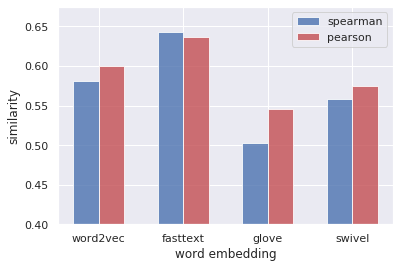

In [29]:
width = 0.3 
ind = np.arange(len(df))

p1 = plt.bar(ind, df['spearman'], width=width, color='b', alpha=0.8, label='spearman')
p2 = plt.bar(ind+width, df['pearson'], width=width, color='r', alpha=0.8, label='pearson')

plt.xlabel('word embedding')
plt.ylabel('similarity')

plt.xticks(ind + width / 2, df.index)
plt.ylim(bottom=0.4)
plt.legend()
plt.show()

### 4.7.3 단어 유추 평가

마찬가지로 단어 유추 평가를 위한 데이터셋을 다운받자.

In [103]:
!wget https://github.com/dongjun-Lee/kor2vec/raw/master/test_dataset/kor_analogy_semantic.txt -P '/home/inhwan/G_drive/Programming/한국어 임베딩/data/raw'

--2019-11-09 22:48:24--  https://github.com/dongjun-Lee/kor2vec/raw/master/test_dataset/kor_analogy_semantic.txt
Resolving github.com (github.com)... 15.164.81.167
접속 github.com (github.com)|15.164.81.167|:443... 접속됨.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dongjun-Lee/kor2vec/master/test_dataset/kor_analogy_semantic.txt [following]
--2019-11-09 22:48:24--  https://raw.githubusercontent.com/dongjun-Lee/kor2vec/master/test_dataset/kor_analogy_semantic.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.228.133
접속 raw.githubusercontent.com (raw.githubusercontent.com)|151.101.228.133|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: 14759 (14K) [text/plain]
Saving to: ‘/home/inhwan/G_drive/Programming/한국어 임베딩/data/raw/kor_analogy_semantic.txt’

kor_analogy_semanti 100%[===================>]  14.41K  --.-KB/s    in 0.09s   

2019-11-09 22:48:25 (169 KB/s) - ‘/home/inhwan/G_drive/Programming/한

In [112]:
analogy_data = [pairs.split() for pairs in open('data/raw/kor_analogy_semantic.txt', 'r')][1:]
analogy_data[:10]

[['대한민국', '서울', '일본', '도쿄'],
 ['대한민국', '서울', '중국', '베이징'],
 ['대한민국', '서울', '미국', '워싱턴'],
 ['대한민국', '서울', '영국', '런던'],
 ['대한민국', '서울', '프랑스', '파리'],
 ['대한민국', '서울', '독일', '베를린'],
 ['대한민국', '서울', '이탈리아', '로마'],
 ['대한민국', '서울', '말레이시아', '쿠알라룸푸르'],
 ['대한민국', '서울', '인도네시아', '자카르타'],
 ['대한민국', '서울', '러시아', '모스크바']]

In [6]:
model = model_selector('word2vec')
model.word_analogy_test('data/raw/kor_analogy_semantic.txt', verbose=False)

# of correct answer: 157 , # of data: 420 , # of errors: 0


In [8]:
model = model_selector('fasttext')
model.word_analogy_test('data/raw/kor_analogy_semantic.txt', verbose=False)

# of correct answer: 111 , # of data: 420 , # of errors: 0


In [9]:
model = model_selector('glove')
model.word_analogy_test('data/raw/kor_analogy_semantic.txt', verbose=False)

# of correct answer: 143 , # of data: 420 , # of errors: 0


In [30]:
model = model_selector('swivel')
model.word_analogy_test('data/raw/kor_analogy_semantic.txt', verbose=False)

# of correct answer: 126 , # of data: 420 , # of errors: 0


In [38]:
res = {
    'word2vec':{'correct':157, 'total_data':420},
    'fasttext':{'correct':111, 'total_data':420},
    'glove':{'correct':143, 'total_data':420},
    'swivel':{'correct':126, 'total_data':420},
}

In [39]:
df = pd.DataFrame.from_dict(res).transpose()
df['analogy_res'] = df['correct']/df['total_data']
df.head()

,correct,total_data,analogy_res
word2vec,157,420,0.373810
fasttext,111,420,0.264286
glove,143,420,0.340476
swivel,126,420,0.300000


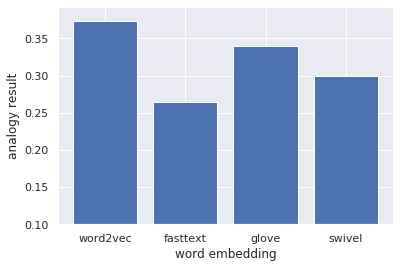

In [40]:
plt.bar(df.index, df['analogy_res'], color='b')

plt.xlabel('word embedding')
plt.ylabel('analogy result')

plt.ylim(bottom=0.1)
plt.show()

### 단어 임베딩 시각화

t-SNE 를 이용한 단어 시각화

In [13]:
model_name = 'word2vec'
model = model_selector(model_name)
model.visualize_words('data/raw/kor_analogy_semantic.txt')
model.visualize_between_words('data/raw/kor_analogy_semantic.txt')
!mv words.png word2vec_words.png
!mv between-words.png word2vec_between-words.png

save @ words.png
save @ between-words.png


In [15]:
model_name = 'fasttext'
model = model_selector(model_name)
model.visualize_words('data/raw/kor_analogy_semantic.txt')
model.visualize_between_words('data/raw/kor_analogy_semantic.txt')
!mv words.png fasttext_words.png
!mv between-words.png fasttext_between-words.png

save @ words.png
save @ between-words.png


In [17]:
model_name = 'glove'
model = model_selector(model_name)
model.visualize_words('data/raw/kor_analogy_semantic.txt')
model.visualize_between_words('data/raw/kor_analogy_semantic.txt')
!mv words.png glove_words.png
!mv between-words.png glove_between-words.png

save @ words.png
save @ between-words.png


In [18]:
model_name = 'swivel'
model = model_selector(model_name)
model.visualize_words('data/raw/kor_analogy_semantic.txt')
model.visualize_between_words('data/raw/kor_analogy_semantic.txt')
!mv words.png swivel_words.png
!mv between-words.png swivel_between-words.png

save @ words.png
save @ between-words.png


<img src="word2vec_words.png" width=500> <img src="fasttext_words.png" width=500> <img src="glove_words.png" width=500> <img src="swivel_words.png" width=500>

<img src="word2vec_between-words.png" width=500> <img src="fasttext_between-words.png" width=500> <img src="glove_between-words.png" width=500> <img src="swivel_between-words.png" width=500>